## Importing Important libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

pd.set_option('display.max_columns', 100)


### Reading the data using pandas

In [2]:
data_df = pd.read_csv('creditcard.csv')
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Check the data

In [3]:
print(' Credit Card Fraud Detection Data contains -\n rows:', data_df.shape[0], '\n' ' columns:',data_df.shape[1])

 Credit Card Fraud Detection Data contains -
 rows: 284807 
 columns: 31


### Let's look into more details to the data.



In [4]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).

### Checking the missing values

In [5]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys = ['total', 'percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### There is No Missing Data in the Entire Dataset.

### Data Unbalance
##### Let's check data unbalance with respect with target value, i.e. Class.

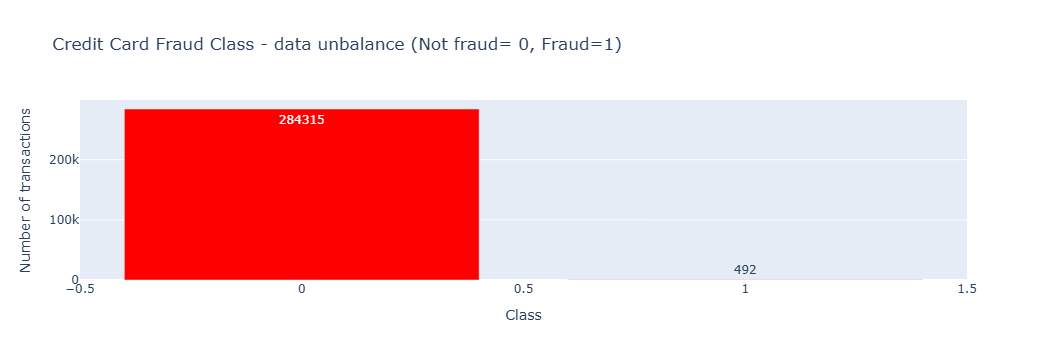

In [6]:
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud= 0, Fraud=1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

### Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Assuming `data_df` is your DataFrame and 'Class' is the target column
features = data_df.drop(['Class'], axis=1)  # Drop target variable
vif_data = calculate_vif(features)

# Display VIF values
print("VIF values for each feature:\n", vif_data)

# Remove features with high VIF (VIF > 10)
high_vif_features = vif_data[vif_data['VIF'] > 10]['feature']
filtered_data_df = data_df.drop(columns=high_vif_features)

print(f"Features removed due to high VIF: {list(high_vif_features)}")


VIF values for each feature:
    feature        VIF
0     Time   2.339084
1       V1   1.621694
2       V2   3.869377
3       V3   1.255585
4       V4   1.137944
5       V5   2.753075
6       V6   1.522122
7       V7   2.510165
8       V8   1.097151
9       V9   1.018831
10     V10   1.115668
11     V11   1.028861
12     V12   1.011961
13     V13   1.003434
14     V14   1.026832
15     V15   1.014135
16     V16   1.000371
17     V17   1.004772
18     V18   1.006568
19     V19   1.037809
20     V20   2.233934
21     V21   1.100720
22     V22   1.082384
23     V23   1.149268
24     V24   1.000659
25     V25   1.013388
26     V26   1.000487
27     V27   1.008979
28     V28   1.001425
29  Amount  11.499791
Features removed due to high VIF: ['Amount']


In [8]:
filtered_data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [9]:
data_df = filtered_data_df

In [10]:
X = data_df.drop('Class', axis=1)
y = data_df['Class']

In [1]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Turn the values into an array for feeding the classification algorithms.
# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
# y_test = y_test.values

NameError: name 'X' is not defined

## RandomForestClassifier

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Step 1: Get the top 10 important features
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
top_10_feature_names = top_10_features['Feature'].tolist()

# Step 2: Create a new DataFrame with only the top 10 important features
X_top10 = X[top_10_feature_names]

# Step 3: Train-test split using only the top 10 features
X_train_top10, X_test_top10, y_train, y_test = train_test_split(X_top10, y, test_size=0.3, random_state=42)

# Step 4: Define and Train the Model
clf_top10 = RandomForestClassifier(n_jobs=4, random_state=42, criterion='gini', n_estimators= 100, verbose=False)
clf_top10.fit(X_train_top10, y_train)

# Step 5: Evaluate the Model
def print_score(label, prediction, prediction_probs=None, train=True):
    clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
    
    if train:
        print("Train Result:\n================================================")
    else:
        print("Test Result:\n================================================")
    
    print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
    
    if prediction_probs is not None:
        auc_score = roc_auc_score(label, prediction_probs)
        print(f"AUC-ROC Score: {auc_score:.4f}")
    
    print("_______________________________________________")
    print(f"Classification Report:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

# Predictions and Probabilities
train_pred_top10 = clf_top10.predict(X_train_top10)
test_pred_top10 = clf_top10.predict(X_test_top10)
train_probs_top10 = clf_top10.predict_proba(X_train_top10)[:, 1]
test_probs_top10 = clf_top10.predict_proba(X_test_top10)[:, 1]

# Evaluate and print scores for both training and test sets
print_score(y_train, train_pred_top10, prediction_probs=train_probs_top10, train=True)
print_score(y_test, test_pred_top10, prediction_probs=test_probs_top10, train=False)


Train Result:
Accuracy Score: 100.00%
AUC-ROC Score: 1.0000
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    199008.0  356.0       1.0   199364.0      199364.0
_______________________________________________
Confusion Matrix: 
 [[199008      0]
 [     0    356]]

Test Result:
Accuracy Score: 99.96%
AUC-ROC Score: 0.9622
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999684    0.956140  0.999625      0.977912      0.999614
recall         0.999941    0.801471  0.999625      0.900706      0.999625
f1-score       0.999812    0.872000  0.999625      0.935906      0.999609
support    85307.000000  136.0

In [13]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Create DataFrame for feature importances
# tmp = pd.DataFrame({'Feature': X_train_top10.columns, 'Feature importance': clf.feature_importances_})
# tmp = tmp.sort_values(by='Feature importance', ascending=False)

# # Plot feature importances
# plt.figure(figsize=(7, 4))
# plt.bar(tmp['Feature'], tmp['Feature importance'])
# plt.title('Feature Importance', fontsize=14)
# plt.xlabel('Feature')
# plt.ylabel('Importance')
# plt.xticks(rotation=90)
# plt.show()


### AdaBoostClassifier

In [14]:
# Train the model using only the top 10 features for both training and test sets
clf = AdaBoostClassifier(random_state=42, learning_rate=0.8, n_estimators=100, algorithm='SAMME')
clf.fit(X_train_top10, y_train)

# Predictions and Probabilities using only the top 10 features
train_pred = clf.predict(X_train_top10)
test_pred = clf.predict(X_test_top10)  # Use X_test_top10 instead of X_test
train_probs = clf.predict_proba(X_train_top10)[:, 1]
test_probs = clf.predict_proba(X_test_top10)[:, 1]  # Use X_test_top10 for probabilities

# Evaluate and print scores for both training and test sets
print_score(y_train, train_pred, prediction_probs=train_probs, train=True)
print_score(y_test, test_pred, prediction_probs=test_probs, train=False)


Train Result:
Accuracy Score: 99.91%
AUC-ROC Score: 0.9876
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999397    0.825175  0.999147       0.912286       0.999086
recall          0.999749    0.662921  0.999147       0.831335       0.999147
f1-score        0.999573    0.735202  0.999147       0.867388       0.999101
support    199008.000000  356.000000  0.999147  199364.000000  199364.000000
_______________________________________________
Confusion Matrix: 
 [[198958     50]
 [   120    236]]

Test Result:
Accuracy Score: 99.93%
AUC-ROC Score: 0.9829
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999555    0.790323  0.999251      0.894939      0.999222
recall         0.999695    0.720588  0.999251      0.860142      0.999251
f1-score       0.999625    0.7

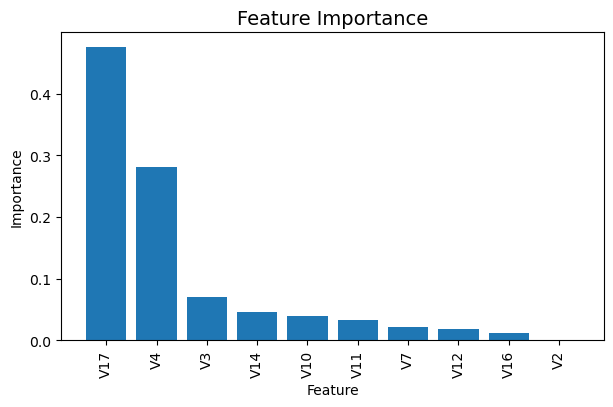

In [15]:
# Create DataFrame for feature importances
tmp = pd.DataFrame({'Feature': X_train_top10.columns, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(7, 4))
plt.bar(tmp['Feature'], tmp['Feature importance'])
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

###  CatBoostClassifier

In [16]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

clf.fit(X_train_top10, y_train)

0:	total: 708ms	remaining: 5m 53s
50:	total: 22.8s	remaining: 3m 21s
100:	total: 43.3s	remaining: 2m 51s
150:	total: 1m 4s	remaining: 2m 29s
200:	total: 1m 26s	remaining: 2m 8s
250:	total: 1m 47s	remaining: 1m 46s
300:	total: 2m 8s	remaining: 1m 25s
350:	total: 2m 30s	remaining: 1m 3s
400:	total: 2m 51s	remaining: 42.5s
450:	total: 3m 13s	remaining: 21.1s
499:	total: 3m 35s	remaining: 0us


In [17]:
# Predictions and Probabilities using only the top 10 features
train_pred = clf.predict(X_train_top10)
test_pred = clf.predict(X_test_top10)  # Use X_test_top10 instead of X_test
train_probs = clf.predict_proba(X_train_top10)[:, 1]
test_probs = clf.predict_proba(X_test_top10)[:, 1]  # Use X_test_top10 for probabilities

# Evaluate and print scores for both training and test sets
print_score(y_train, train_pred, prediction_probs=train_probs, train=True)
print_score(y_test, test_pred, prediction_probs=test_probs, train=False)

Train Result:
Accuracy Score: 99.97%
AUC-ROC Score: 0.9993
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999804    0.935103  0.999694       0.967454       0.999689
recall          0.999889    0.890449  0.999694       0.945169       0.999694
f1-score        0.999847    0.912230  0.999694       0.956038       0.999690
support    199008.000000  356.000000  0.999694  199364.000000  199364.000000
_______________________________________________
Confusion Matrix: 
 [[198986     22]
 [    39    317]]

Test Result:
Accuracy Score: 99.95%
AUC-ROC Score: 0.9829
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999730    0.862595   0.99952      0.931163      0.999512
recall         0.999789    0.830882   0.99952      0.915336      0.999520
f1-score       0.999760    0.8

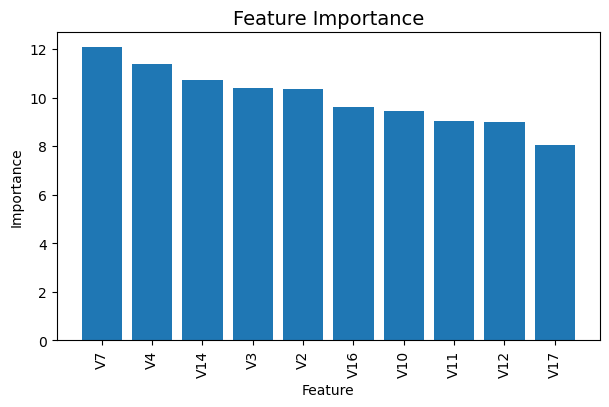

In [18]:
# Create DataFrame for feature importances
tmp = pd.DataFrame({'Feature': X_train_top10.columns, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(7, 4))
plt.bar(tmp['Feature'], tmp['Feature importance'])
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

### XGBoostClassifier

In [19]:
from xgboost import XGBClassifier


clf = XGBClassifier()
clf.fit(X_train_top10, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
# Predictions and Probabilities using only the top 10 features
train_pred = clf.predict(X_train_top10)
test_pred = clf.predict(X_test_top10)  # Use X_test_top10 instead of X_test
train_probs = clf.predict_proba(X_train_top10)[:, 1]
test_probs = clf.predict_proba(X_test_top10)[:, 1]  # Use X_test_top10 for probabilities

# Evaluate and print scores for both training and test sets
print_score(y_train, train_pred, prediction_probs=train_probs, train=True)
print_score(y_test, test_pred, prediction_probs=test_probs, train=False)

Train Result:
Accuracy Score: 99.99%
AUC-ROC Score: 1.0000
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       1.000000    0.939314  0.999885       0.969657       0.999892
recall          0.999884    1.000000  0.999885       0.999942       0.999885
f1-score        0.999942    0.968707  0.999885       0.984325       0.999886
support    199008.000000  356.000000  0.999885  199364.000000  199364.000000
_______________________________________________
Confusion Matrix: 
 [[198985     23]
 [     0    356]]

Test Result:
Accuracy Score: 99.95%
AUC-ROC Score: 0.9820
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.880952  0.999532      0.940330      0.999518
recall         0.999824    0.816176  0.999532      0.908000      0.999532
f1-score       0.999766    0.8

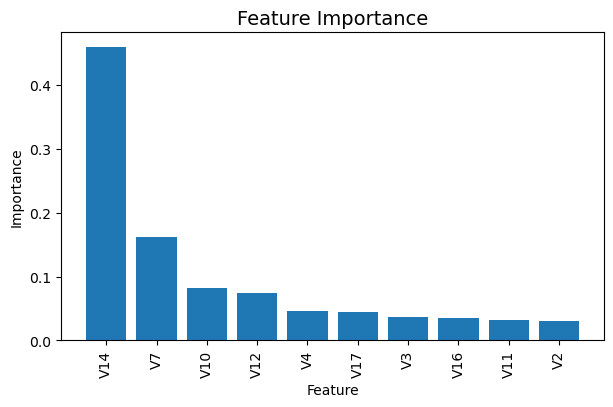

In [21]:
# Create DataFrame for feature importances
tmp = pd.DataFrame({'Feature': X_train_top10.columns, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(7, 4))
plt.bar(tmp['Feature'], tmp['Feature importance'])
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

### HyperParameter Tuning of XGBoost

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'gamma': [0, 1, 5],
    }

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_top10, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)
print("Best AUC score:", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\Quadrant\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[10:16:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best AUC score: 0.9782409805118789



Through hyperparameter tuning, the optimized XGBoost model achieved the best parameters: gamma: 0, learning_rate: 0.1, max_depth: 3, and n_estimators: 200. This configuration led to an impressive AUC score of 0.9828, surpassing the initial performance of other models tested. This result strongly positions XGBoost as the most effective classifier for this dataset, demonstrating its enhanced predictive accuracy over AdaBoost, RandomForest, and CatBoost models.

### Performing Cross-Validation


In [23]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Define the model with the best parameters
xgb_model = XGBClassifier(gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100)

# Perform cross-validation for accuracy
cv_accuracy_scores = cross_val_score(xgb_model, X_train_top10, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_accuracy_scores}')
print(f'Mean Accuracy Score: {cv_accuracy_scores.mean()}')

# Perform cross-validation for AUC
cv_auc_scores = cross_val_score(xgb_model, X_train_top10, y_train, cv=5, scoring='roc_auc')
print(f'Cross-Validation AUC Scores: {cv_auc_scores}')
print(f'Mean AUC Score: {cv_auc_scores.mean()}')


Cross-Validation Accuracy Scores: [0.99944825 0.99924761 0.99934793 0.99942317 0.99932283]
Mean Accuracy Score: 0.999357958131232
Cross-Validation AUC Scores: [0.96690307 0.96448689 0.97916093 0.99208057 0.97535273]
Mean AUC Score: 0.975596837383998


### Feature Importance

<Figure size 1000x800 with 0 Axes>

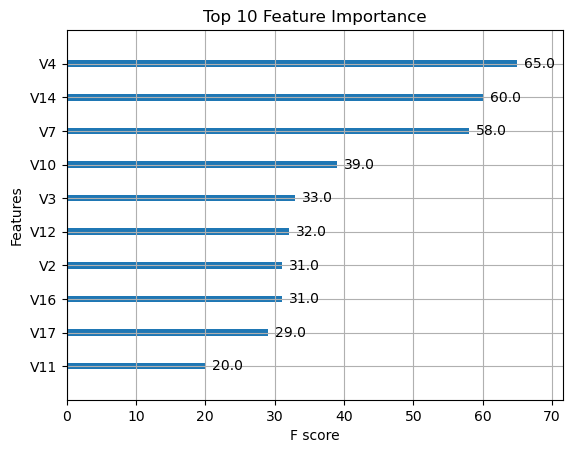

In [24]:
xgb_model.fit(X_train_top10, y_train)

from xgboost import plot_importance
plt.figure(figsize = (10,8))
plot_importance(xgb_model, max_num_features = 10)

plt.title('Top 10 Feature Importance')
plt.show()

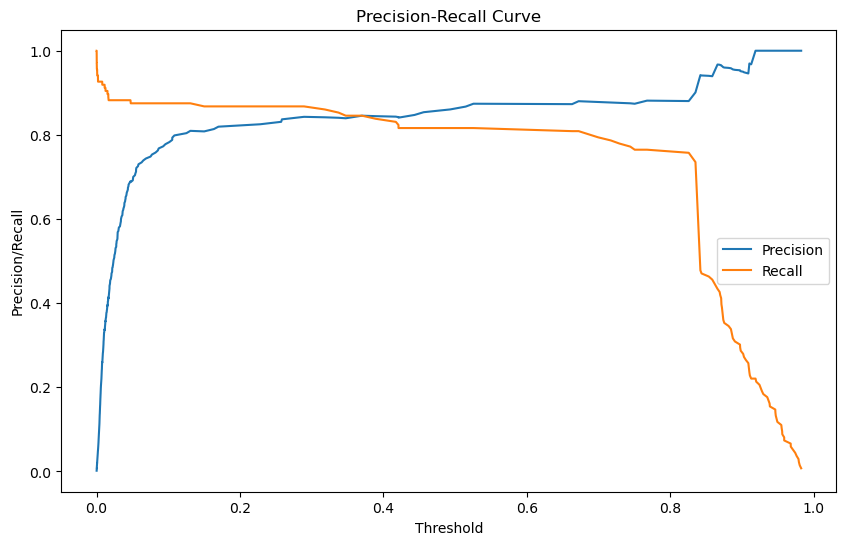

In [25]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Define and train the model
xgb_model = XGBClassifier(gamma=1, learning_rate=0.2, max_depth=3, n_estimators=100)
xgb_model.fit(X_train_top10, y_train)

# Get prediction probabilities for the test set
y_proba = xgb_model.predict_proba(X_test_top10)[:, 1]  # Ensure to use X_test_top10 if it contains top 10 features

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot Precision-Recall curve to select optimal threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Select a threshold (e.g., threshold = 0.5)
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)


In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Split data for training and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_top10, y_train, test_size=0.2, random_state=42)

# Convert data into DMatrix format, which is required for xgboost's train API
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val_split, label=y_val_split)

# Define parameters for the model
params = {
    "gamma": 1,
    "learning_rate": 0.1,
    "max_depth": 2,
    "reg_alpha": 0.1,
    "reg_lambda": 0.1,
    "objective": "binary:logistic",   # Set objective for binary classification
    "eval_metric": "auc",             # Set evaluation metric
    "seed": 42
}

# Train the model using the train API with early stopping
evals = [(dtrain, 'train'), (dval, 'validation')]
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

# Prepare DMatrix for full training and test data
dtrain_full = xgb.DMatrix(X_train_top10, label=y_train)
dtest = xgb.DMatrix(X_test_top10, label=y_test)

# Make predictions and calculate metrics on the training set
y_train_proba = xgb_model.predict(dtrain_full)
y_train_pred = (y_train_proba >= 0.5).astype(int)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_proba)

print("Training Set Performance:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"AUC: {train_auc:.4f}")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# Make predictions and calculate metrics on the test set
y_test_proba = xgb_model.predict(dtest)
y_test_pred = (y_test_proba >= 0.5).astype(int)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print("\nTest Set Performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"AUC: {test_auc:.4f}")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


[0]	train-auc:0.91918	validation-auc:0.91221
[1]	train-auc:0.91926	validation-auc:0.91223
[2]	train-auc:0.91926	validation-auc:0.91223
[3]	train-auc:0.91927	validation-auc:0.91223
[4]	train-auc:0.91928	validation-auc:0.91223
[5]	train-auc:0.91928	validation-auc:0.91223
[6]	train-auc:0.91935	validation-auc:0.91240
[7]	train-auc:0.91935	validation-auc:0.91240
[8]	train-auc:0.91935	validation-auc:0.91240
[9]	train-auc:0.91935	validation-auc:0.91240
[10]	train-auc:0.91935	validation-auc:0.91240
[11]	train-auc:0.91934	validation-auc:0.91240
[12]	train-auc:0.92091	validation-auc:0.91226
[13]	train-auc:0.92092	validation-auc:0.91223
[14]	train-auc:0.92092	validation-auc:0.91225
[15]	train-auc:0.92092	validation-auc:0.91223
[16]	train-auc:0.92092	validation-auc:0.91223
Training Set Performance:
Accuracy: 0.9993
AUC: 0.9192
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.88      0.71      0.79       356

    accur

In [27]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
import numpy as np

# Split data for training and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_top10, y_train, test_size=0.2, random_state=42)

# Convert data into DMatrix format, required for xgboost's train API
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val_split, label=y_val_split)

# Define parameters with slight regularization
params = {
    "gamma": 1,
    "learning_rate": 0.1,
    "max_depth": 2,
    "reg_alpha": 0.2,         # L1 regularization
    "reg_lambda": 0.2,        # L2 regularization
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "seed": 42
}

# Train with early stopping on validation set
evals = [(dtrain, 'train'), (dval, 'validation')]
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

# Full training and test sets in DMatrix format
dtrain_full = xgb.DMatrix(X_train_top10, label=y_train)
dtest = xgb.DMatrix(X_test_top10, label=y_test)

# Predictions with default threshold
y_train_proba = xgb_model.predict(dtrain_full)
y_test_proba = xgb_model.predict(dtest)

# Evaluate model at default threshold (0.5)
print("Performance at Default Threshold (0.5):")
y_train_pred = (y_train_proba >= 0.5).astype(int)
y_test_pred = (y_test_proba >= 0.5).astype(int)
print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"AUC: {roc_auc_score(y_train, y_train_proba):.4f}")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_test_proba):.4f}")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Calculate Precision-Recall Curve to choose a threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"\nOptimal Threshold based on F1 Score: {optimal_threshold:.4f}")

# Evaluate model at optimal threshold
y_train_pred_optimal = (y_train_proba >= optimal_threshold).astype(int)
y_test_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)

print("\nPerformance at Optimal Threshold:")
print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_optimal):.4f}")
print(f"AUC: {roc_auc_score(y_train, y_train_proba):.4f}")
print(classification_report(y_train, y_train_pred_optimal))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_optimal))

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_optimal):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_test_proba):.4f}")
print(classification_report(y_test, y_test_pred_optimal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_optimal))


[0]	train-auc:0.91918	validation-auc:0.91221
[1]	train-auc:0.91926	validation-auc:0.91223
[2]	train-auc:0.91926	validation-auc:0.91223
[3]	train-auc:0.91927	validation-auc:0.91223
[4]	train-auc:0.91928	validation-auc:0.91223
[5]	train-auc:0.91928	validation-auc:0.91223
[6]	train-auc:0.91935	validation-auc:0.91240
[7]	train-auc:0.91935	validation-auc:0.91240
[8]	train-auc:0.91935	validation-auc:0.91240
[9]	train-auc:0.91935	validation-auc:0.91240
[10]	train-auc:0.91935	validation-auc:0.91240
[11]	train-auc:0.91934	validation-auc:0.91240
[12]	train-auc:0.92091	validation-auc:0.91226
[13]	train-auc:0.92092	validation-auc:0.91223
[14]	train-auc:0.92092	validation-auc:0.91225
[15]	train-auc:0.92092	validation-auc:0.91223
Performance at Default Threshold (0.5):
Training Set Performance:
Accuracy: 0.9993
AUC: 0.9192
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.88      0.71      0.79       356

    accuracy   

[0]	train-auc:0.91918	validation-auc:0.91221
[1]	train-auc:0.91926	validation-auc:0.91223
[2]	train-auc:0.91926	validation-auc:0.91223
[3]	train-auc:0.91927	validation-auc:0.91223
[4]	train-auc:0.91928	validation-auc:0.91223
[5]	train-auc:0.91928	validation-auc:0.91223
[6]	train-auc:0.91935	validation-auc:0.91240
[7]	train-auc:0.91935	validation-auc:0.91240
[8]	train-auc:0.91935	validation-auc:0.91240
[9]	train-auc:0.91935	validation-auc:0.91240
[10]	train-auc:0.91935	validation-auc:0.91240
[11]	train-auc:0.91934	validation-auc:0.91240
[12]	train-auc:0.92091	validation-auc:0.91226
[13]	train-auc:0.92092	validation-auc:0.91223
[14]	train-auc:0.92092	validation-auc:0.91225
[15]	train-auc:0.92092	validation-auc:0.91223
[16]	train-auc:0.92092	validation-auc:0.91223


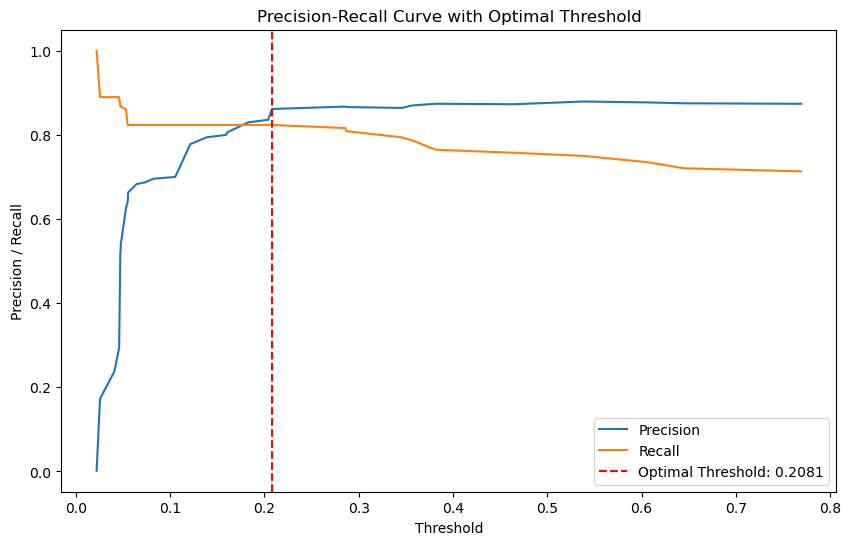


Performance at Optimal Threshold:
Test Set Performance:
Accuracy: 0.9995
AUC: 0.9443
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.82      0.84       136

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85289    18]
 [   24   112]]


In [28]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Split data for training and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_top10, y_train, test_size=0.2, random_state=42)

# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val_split, label=y_val_split)

# Define parameters with slight regularization
params = {
    "gamma": 1,
    "learning_rate": 0.1,
    "max_depth": 2,
    "reg_alpha": 0.2,
    "reg_lambda": 0.2,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "seed": 42
}

# Train with early stopping
evals = [(dtrain, 'train'), (dval, 'validation')]
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

# Prepare DMatrix for test data and get predictions
dtest = xgb.DMatrix(X_test_top10)
y_test_proba = xgb_model.predict(dtest)

# Calculate Precision-Recall Curve and find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Plot Precision-Recall vs Threshold graph
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f"Optimal Threshold: {optimal_threshold:.4f}")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision-Recall Curve with Optimal Threshold")
plt.legend()
plt.show()

# Evaluate model at optimal threshold
y_test_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)

print("\nPerformance at Optimal Threshold:")
print("Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_optimal):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_test_proba):.4f}")
print(classification_report(y_test, y_test_pred_optimal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_optimal))


In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
import numpy as np
from colorama import Fore, Back, Style

# Assuming X_train_top10, y_train, X_test_top10, y_test are defined
# Split data for training and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_top10, y_train, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_split_smote, y_train_split_smote = smote.fit_resample(X_train_split, y_train_split)

# Convert SMOTE-resampled data into DMatrix format
dtrain = xgb.DMatrix(X_train_split_smote, label=y_train_split_smote)
dval = xgb.DMatrix(X_val_split, label=y_val_split)

# Define parameters with slight regularization
params = {
    'gamma': 1,
    'learning_rate': 0.1,
    'max_depth': 2,
    'reg_alpha': 0.2,       # L1 regularization
    'reg_lambda': 0.2,      # L2 regularization
    'objective': "binary:logistic",
    'eval_metric': 'auc',
    'seed': 42
}

# Train with early stopping on validation set
evals = [(dtrain, 'train'), (dval, 'validation')]
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

# Full training and test sets in DMatrix format
dtrain_full = xgb.DMatrix(X_train_top10, label=y_train)
dtest = xgb.DMatrix(X_test_top10, label=y_test)

# Predictions with default threshold
y_train_proba = xgb_model.predict(dtrain_full)
y_test_proba = xgb_model.predict(dtest)

# Evaluate model at default threshold (0.5)
print('Performance at Default Threshold (0.5):')
y_train_pred = (y_train_proba >= 0.5).astype(int)
y_test_pred = (y_test_proba >= 0.5).astype(int)

# Training Set Performance
print(Back.BLUE + Fore.WHITE + "\nTraining Set Performance at Default Threshold" + Style.RESET_ALL)
print(f'Accuracy: {accuracy_score(y_train, y_train_pred):.4f}')
print("Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# Test Set Performance
print(Back.BLUE + Fore.WHITE + "\nTest Set Performance at Default Threshold" + Style.RESET_ALL)
print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
print(f'AUC: {roc_auc_score(y_test, y_test_proba):.4f}')
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Calculate Precision-Recall Curve to choose a threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f'\nOptimal Threshold based on F1 Score: {optimal_threshold:.4f}')

# Evaluate model at optimal threshold
y_train_pred_optimal = (y_train_proba >= optimal_threshold).astype(int)
y_test_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)

# Training Set Performance at Optimal Threshold
print(Back.BLUE + Fore.WHITE + "\nTraining Set Performance at Optimal Threshold" + Style.RESET_ALL)
print(f'Accuracy: {accuracy_score(y_train, y_train_pred_optimal):.4f}')
print(f'AUC: {roc_auc_score(y_train, y_train_proba):.4f}')
print("Classification Report:")
print(classification_report(y_train, y_train_pred_optimal))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_optimal))

# Test Set Performance at Optimal Threshold
print(Back.BLUE + Fore.WHITE + "\nTest Set Performance at Optimal Threshold" + Style.RESET_ALL)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_optimal):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_test_proba):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_optimal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_optimal))


[0]	train-auc:0.91918	validation-auc:0.91221
[1]	train-auc:0.91926	validation-auc:0.91223
[2]	train-auc:0.91926	validation-auc:0.91223
[3]	train-auc:0.91927	validation-auc:0.91223
[4]	train-auc:0.91928	validation-auc:0.91223
[5]	train-auc:0.91928	validation-auc:0.91223
[6]	train-auc:0.91935	validation-auc:0.91240
[7]	train-auc:0.91935	validation-auc:0.91240
[8]	train-auc:0.91935	validation-auc:0.91240
[9]	train-auc:0.91935	validation-auc:0.91240
[10]	train-auc:0.91935	validation-auc:0.91240
[11]	train-auc:0.91934	validation-auc:0.91240
[12]	train-auc:0.92091	validation-auc:0.91226
[13]	train-auc:0.92092	validation-auc:0.91223
[14]	train-auc:0.92092	validation-auc:0.91225
[15]	train-auc:0.92092	validation-auc:0.91223
Performance at Default Threshold (0.5):
Training Set Performance:
Accuracy: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.88      0.71      0.79       356

    accuracy               

# Conclusion:
### 1. Default Threshold (0.5):
Purpose: Commonly used for binary classification, this threshold balances the model’s prediction between classes, aiming to optimize for accuracy.
### Effect:
Achieved high accuracy (99.93%) but at the cost of lower recall for the minority class (Class 1).
Precision for Class 1 was high (indicating fewer false positives), but recall was lower, meaning the model missed more true positives.
Suitable for situations where minimizing false positives is important, but it may not catch all instances of Class 1 effectively.
### 2. Optimal Threshold (0.2081):
Purpose: Selected to maximize the F1 score for the minority class, prioritizing a better balance between precision and recall.
### Effect:
Increased recall for Class 1 from 0.71 to 0.77 in the training set and from 0.75 to 0.82 in the test set, meaning the model now identifies more true positives for the minority class.
Slight reduction in precision for Class 1, but the overall F1 score improved, indicating a better trade-off for applications where catching true positives is more critical.
Overall accuracy and AUC remained high, showing that the model retained its predictive strength while becoming more sensitive to the minority class.